In [ ]:
# https://github.com/J-hjr/Jerry_Huang_DS_Project_Portfolio/tree/main/Spotify_ML

# Spotify Song Classification
by Jerry Huang 

**What I have done:**  
- `Data Preprocessing`: 
    - `Handling durations`:
        - This is necessary because the duration includes missing values.
        - Replaced missing values with the median of the duration.
    - `Handling tempo`
        - This is necessary because the tempo includes missing values as well.
        - Replaced missing values with the median of the tempo.
    - `Handling Missing Values`
        - Dropped the 5 rows with missing values.
    - `Train Test Split`
        - Train test split with stratification on music genre
        - Split by 90% and 10%, where each strata has the same proportion of the target variable.
    - `Get Dummy Variables`
        - `Music Genre`
        - `Key`
        - `Mode`
    - `Normalization`
        - I only normalized the numerical variables.
        - Normalization is necessary because the variables have different scales.
        - Normalize after train test split to avoid data leakage.
- `Dimension Reduction`
    - `PCA`
    - `tSNE`
    - `UMAP`
    - `LDA`
- `Clustering`
    - `KMeans with PCA`
    - `Kmeans with UMAP`
- `Modeling`
    - `Mutiple Models with original data`
    - `FNN with PCA`



In [ ]:
# Importing libraries
import pandas as pd
import random
random.seed(13133910)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from tqdm import tqdm

# Importing Machine Learning libraries
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

# Train test split:
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize


# Machine learning Models:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Hyperparameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


# Feature cluster:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import umap.umap_ as umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Model evaluation:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/opt/anaconda3/envs/FML/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Preprocessing

In [4]:
musicData = pd.read_csv("musicData.csv")

In [5]:
musicData.describe()

instance_id    popularity  acousticness  danceability   duration_ms  \
count  50000.000000  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   55888.396360     44.220420      0.306383      0.558241  2.212526e+05   
std    20725.256253     15.542008      0.341340      0.178632  1.286720e+05   
min    20002.000000      0.000000      0.000000      0.059600 -1.000000e+00   
25%    37973.500000     34.000000      0.020000      0.442000  1.748000e+05   
50%    55913.500000     45.000000      0.144000      0.568000  2.192810e+05   
75%    73863.250000     56.000000      0.552000      0.687000  2.686122e+05   
max    91759.000000     99.000000      0.996000      0.986000  4.830606e+06   

             energy  instrumentalness      liveness      loudness  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       0.599755          0.181601      0.193896     -9.133761   
std        0.264559          0.325409      0.161637      6.162990   
min        0.000792          0.000000      0.009670    -47.046000   
25%        0.433000          0.000000      0.096900    -10.860000   
50%        0.643000          0.000158      0.126000     -7.276500   
75%        0.815000          0.155000      0.244000     -5.173000   
max        0.999000          0.996000      1.000000      3.744000   

        speechiness       valence  
count  50000.000000  50000.000000  
mean       0.093586      0.456264  
std        0.101373      0.247119  
min        0.022300      0.000000  
25%        0.036100      0.257000  
50%        0.048900      0.448000  
75%        0.098525      0.648000  
max        0.942000      0.992000

In [6]:
musicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

## Handling durations

In [5]:
musicData['duration_ms'].value_counts()

duration_ms
-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 154574.0       1
 359213.0       1
 656213.0       1
 506320.0       1
 189483.0       1
Name: count, Length: 26028, dtype: int64

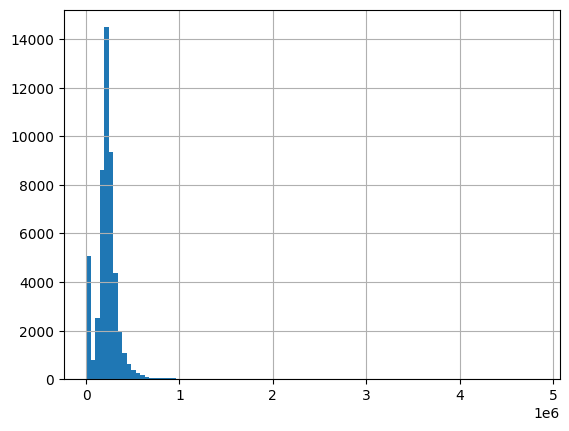

In [6]:
plt.hist(musicData['duration_ms'], bins=100)
plt.grid()
plt.show()

In [7]:
valid_durations = musicData[musicData['duration_ms'] != -1]['duration_ms']
median_duration = valid_durations.median()
print(median_duration)

227360.0


In [8]:
musicData['duration_ms'] = musicData['duration_ms'].replace(-1, median_duration)
print((musicData['duration_ms'] == -1).sum())  # Should be 0

0


## Handling tempo

In [9]:
musicData['tempo'].value_counts()

tempo
?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
137.046                  1
136.378                  1
93.041                   1
113.98200000000001       1
99.20100000000001        1
Name: count, Length: 29394, dtype: int64

In [10]:
# Check for missing values
missing = musicData[musicData['tempo'] == '?'].shape[0]
print(f'We are having {missing/musicData.shape[0]*100:.2f}% of missing values in the tempo column' )

We are having 9.96% of missing values in the tempo column


In [11]:
musicData['tempo'] = musicData['tempo'].replace('?', np.nan)
musicData['tempo'] = musicData['tempo'].astype(float)
print(musicData['tempo'].median())
musicData['tempo'].fillna(musicData['tempo'].median(), inplace=True)

119.87899999999999


C:\Users\12197\AppData\Local\Temp\ipykernel_33296\3290126590.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  musicData['tempo'].fillna(musicData['tempo'].median(), inplace=True)


In [12]:
musicData['tempo'].value_counts()

tempo
119.879    4985
140.007      17
120.000      17
100.003      16
100.014      15
           ... 
137.046       1
136.378       1
93.041        1
113.982       1
99.201        1
Name: count, Length: 29394, dtype: int64

In [13]:
musicData[musicData.isna().any(axis=1)]

instance_id artist_name track_name  popularity  acousticness  \
10000          NaN         NaN        NaN         NaN           NaN   
10001          NaN         NaN        NaN         NaN           NaN   
10002          NaN         NaN        NaN         NaN           NaN   
10003          NaN         NaN        NaN         NaN           NaN   
10004          NaN         NaN        NaN         NaN           NaN   

       danceability  duration_ms  energy  instrumentalness  key  liveness  \
10000           NaN          NaN     NaN               NaN  NaN       NaN   
10001           NaN          NaN     NaN               NaN  NaN       NaN   
10002           NaN          NaN     NaN               NaN  NaN       NaN   
10003           NaN          NaN     NaN               NaN  NaN       NaN   
10004           NaN          NaN     NaN               NaN  NaN       NaN   

       loudness mode  speechiness    tempo obtained_date  valence music_genre  
10000       NaN  NaN          NaN  119.879           NaN      NaN         NaN  
10001       NaN  NaN          NaN  119.879           NaN      NaN         NaN  
10002       NaN  NaN          NaN  119.879           NaN      NaN         NaN  
10003       NaN  NaN          NaN  119.879           NaN      NaN         NaN  
10004       NaN  NaN          NaN  119.879           NaN      NaN         NaN

In [14]:
musicData.dropna(how='any', inplace=True)

In [15]:
musicData.isna().sum()


instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

## Train test split our features to prevent data leakage
**Why We Standardized Again After Train-Test Split**

To properly train our models and prevent **data leakage**, we standardized the numerical features again — **but only after splitting the data**. Specifically, we applied `StandardScaler().fit()` on the training data, then used `.transform()` on both the training and testing sets.

This avoids leaking statistical information (mean, standard deviation) from the test set into the training process. If we had standardized the entire dataset before splitting, the model would indirectly “see” the test data’s distribution, leading to overly optimistic performance and invalid evaluation results.


In [16]:
musicData

instance_id           artist_name                track_name  \
0          32894.0              Röyksopp      Röyksopp's Night Out   
1          46652.0  Thievery Corporation          The Shining Path   
2          30097.0        Dillon Francis                 Hurricane   
3          62177.0              Dubloadz                     Nitro   
4          24907.0           What So Not          Divide & Conquer   
...            ...                   ...                       ...   
50000      58878.0                 BEXEY                  GO GETTA   
50001      43557.0             Roy Woods       Drama (feat. Drake)   
50002      39767.0                Berner  Lovin' Me (feat. Smiggz)   
50003      57944.0             The-Dream         Shawty Is Da Shit   
50004      63470.0     Naughty By Nature            Hip Hop Hooray   

       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652     227360.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913     227360.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0               0.79200  A#     0.115    -5.201  Minor       0.0748  100.889   
1               0.95000   D     0.124    -7.043  Minor       0.0300  115.002   
2               0.01180  G#     0.534    -4.617  Major       0.0345  127.994   
3               0.00253  C#     0.157    -4.498  Major       0.2390  128.014   
4               0.90900  F#     0.157    -6.266  Major       0.0413  145.036   
...                 ...  ..       ...       ...    ...          ...      ...   
50000           0.00000  C#     0.119    -7.022  Major       0.2980   98.028   
50001           0.00000   B     0.109    -9.814  Major       0.0550  122.043   
50002           0.00000   D     0.143    -5.443  Major       0.1460  131.079   
50003           0.00000   G     0.106    -5.016  Minor       0.0441   75.886   
50004           0.00000  F#     0.272   -13.652  Minor       0.1010   99.201   

      obtained_date  valence music_genre  
0             4-Apr    0.759  Electronic  
1             4-Apr    0.531  Electronic  
2             4-Apr    0.333  Electronic  
3             4-Apr    0.270  Electronic  
4             4-Apr    0.323  Electronic  
...             ...      ...         ...  
50000         4-Apr    0.330     Hip-Hop  
50001         4-Apr    0.113     Hip-Hop  
50002         4-Apr    0.395     Hip-Hop  
50003         4-Apr    0.354     Hip-Hop  
50004         4-Apr    0.765     Hip-Hop  

[50000 rows x 18 columns]

**Features**  

All features are numeric, including dummy variables.  
Obtained_date is removed.  



In [17]:
# STEP 1: Dummy Encoding for categorical variables
key_dummies = pd.get_dummies(musicData['key'], prefix='key').astype(int)
mode_dummies = pd.get_dummies(musicData['mode'], prefix='mode').astype(int)

# STEP 2: Label encode genre
label_encoder = LabelEncoder()
musicData['genre_encoded'] = label_encoder.fit_transform(musicData['music_genre'])

# STEP 3: Concatenate dummy variables to musicData
musicData_encoded = pd.concat([musicData, key_dummies, mode_dummies], axis=1)

# STEP 4: Define numerical features for scaling
numerical_features = ['popularity', 'danceability', 'energy', 'loudness',
                      'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence']

# STEP 5: Define final feature set
dummy_columns = list(key_dummies.columns) + list(mode_dummies.columns)
all_feature_columns = numerical_features + dummy_columns

# STEP 6: Split BEFORE standardizing
X_raw = musicData_encoded[all_feature_columns]
y = musicData_encoded['genre_encoded']

y.value_counts()

genre_encoded
5    5000
1    5000
7    5000
0    5000
4    5000
8    5000
2    5000
9    5000
3    5000
6    5000
Name: count, dtype: int64

Since we have evenly 5000 data for each class, we can use stratify to split the data into training and testing sets, which also ensures that the proportion of each class is the same in both sets.  

In [18]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, stratify=y, test_size=0.1, random_state=13133910)

# STEP 7: Standardize numerical features (only numerical)
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_raw[numerical_features])
X_test_num = scaler.transform(X_test_raw[numerical_features])

# STEP 8: Combine scaled numerical + dummy
# X_train = np.concatenate([X_train_num, X_train_raw[dummy_columns].values], axis=1)
# X_test = np.concatenate([X_test_num, X_test_raw[dummy_columns].values], axis=1)
X_train = pd.concat([
    pd.DataFrame(X_train_num, columns=numerical_features, index=X_train_raw.index),
    X_train_raw[dummy_columns]
], axis=1)

X_test = pd.concat([
    pd.DataFrame(X_test_num, columns=numerical_features, index=X_test_raw.index),
    X_test_raw[dummy_columns]
], axis=1)
# Final shape check
print(X_train.shape, X_test.shape)

(45000, 23) (5000, 23)


**Target Variable Encoding**

The target variable `genre` was label-encoded using `LabelEncoder` to convert genre names (e.g., 'Hip-Hop', 'Rock') into integer labels (e.g., 0, 1, ..., 9).  
This step is required for compatibility with scikit-learn classifiers.


In [19]:
X_train

popularity  danceability    energy  loudness  speechiness  \
45991    0.628308      0.479713  0.774546  0.748251     0.038061   
6311    -1.750609     -0.801123 -0.795771 -0.046171    -0.649971   
7696    -1.107658     -0.146722  1.315644  1.072888    -0.491497   
92      -1.171953      0.026666  0.116148  0.558879     1.037134   
6606    -1.814904      0.043446 -2.187110 -2.954137    -0.348772   
...           ...           ...       ...       ...          ...   
5424    -1.750609      0.462934 -1.802288 -1.695600    -0.591897   
14377   -0.464707      0.468527  0.002631  0.373071    -0.591897   
20257   -0.464707      0.222427 -0.530898  0.068683    -0.698202   
5957    -1.557723     -0.163502  0.558864  0.153083     3.123869   
9552    -2.007789     -0.420787  0.275072  0.230840    -0.272981   

       acousticness  instrumentalness  liveness   valence  key_A  ...  key_C#  \
45991      0.430346         -0.558360 -0.518763  0.017715      0  ...       0   
6311      -0.832910          1.505663  0.111540 -0.892622      0  ...       0   
7696      -0.894999         -0.558391 -0.574377  1.097980      0  ...       0   
92        -0.892143         -0.555197 -0.568198 -1.005908      0  ...       0   
6606       2.013813          1.994033 -0.680664 -0.941173      0  ...       0   
...             ...               ...       ...       ...    ...  ...     ...   
5424       1.506517          1.063366 -0.117099 -1.513673      0  ...       0   
14377      1.298320         -0.464710 -0.737514  1.963811      0  ...       0   
20257      1.119447         -0.558124 -0.537301 -0.374741      0  ...       0   
5957      -0.059357         -0.545798  0.160975  1.061567      0  ...       0   
9552      -0.631458          1.828171 -0.562019  1.858617      0  ...       1   

       key_D  key_D#  key_E  key_F  key_F#  key_G  key_G#  mode_Major  \
45991      0       0      0      0       0      0       0           0   
6311       0       0      0      0       0      1       0           1   
7696       0       0      0      0       0      0       0           1   
92         0       0      0      0       0      0       0           1   
6606       0       0      0      0       0      1       0           1   
...      ...     ...    ...    ...     ...    ...     ...         ...   
5424       0       0      0      0       0      1       0           1   
14377      0       0      0      0       0      0       0           0   
20257      0       0      1      0       0      0       0           1   
5957       0       0      0      0       0      0       0           0   
9552       0       0      0      0       0      0       0           1   

       mode_Minor  
45991           1  
6311            0  
7696            0  
92              0  
6606            0  
...           ...  
5424            0  
14377           1  
20257           0  
5957            1  
9552            0  

[45000 rows x 23 columns]

In [20]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({6: 4500, 1: 4500, 5: 4500, 7: 4500, 8: 4500, 9: 4500, 2: 4500, 3: 4500, 0: 4500, 4: 4500})
Counter({7: 500, 2: 500, 4: 500, 1: 500, 6: 500, 3: 500, 8: 500, 5: 500, 0: 500, 9: 500})


# Exploratory dimensionality reduction
- `label_encoder.classes_`: Getting the genre for legend. LabelEncoder() enables us to convert categorical data to numerical data.

**Dimensionality Reduction Input**

To ensure valid and meaningful results, all dimensionality reduction methods were applied only on the final feature matrix `X`, which includes:
- Standardized numerical features
- One-hot encoded categorical features (dummy variables)

We excluded target labels and raw string-based metadata from the dimensionality reduction input to avoid data leakage and maintain interpretability.



In [21]:
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")

0: Alternative
1: Anime
2: Blues
3: Classical
4: Country
5: Electronic
6: Hip-Hop
7: Jazz
8: Rap
9: Rock


In [22]:
musicData['music_genre'].value_counts()

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64

**music_genre analysis**  
Since each genre has equally 5000 songs, we don't need to do the sampling or downsampling in this case, which is more efficient.  
Also, we can use use PCA and tSNE to visualize the data, checking how they are distributed and how they are separated.  
Let's start!  

### PCA:
**Goal**: Reduce dimensionality by maximizing variance along orthogonal directions.  
**Parameters Used**:
- `n_components = 2`: Reduce to 2 dimensions for 2D visualization

**Notes**:
- PCA preserves global structure
- Assumes linear relationships
- Suitable for numerical, standardized data
- Fast and interpretable

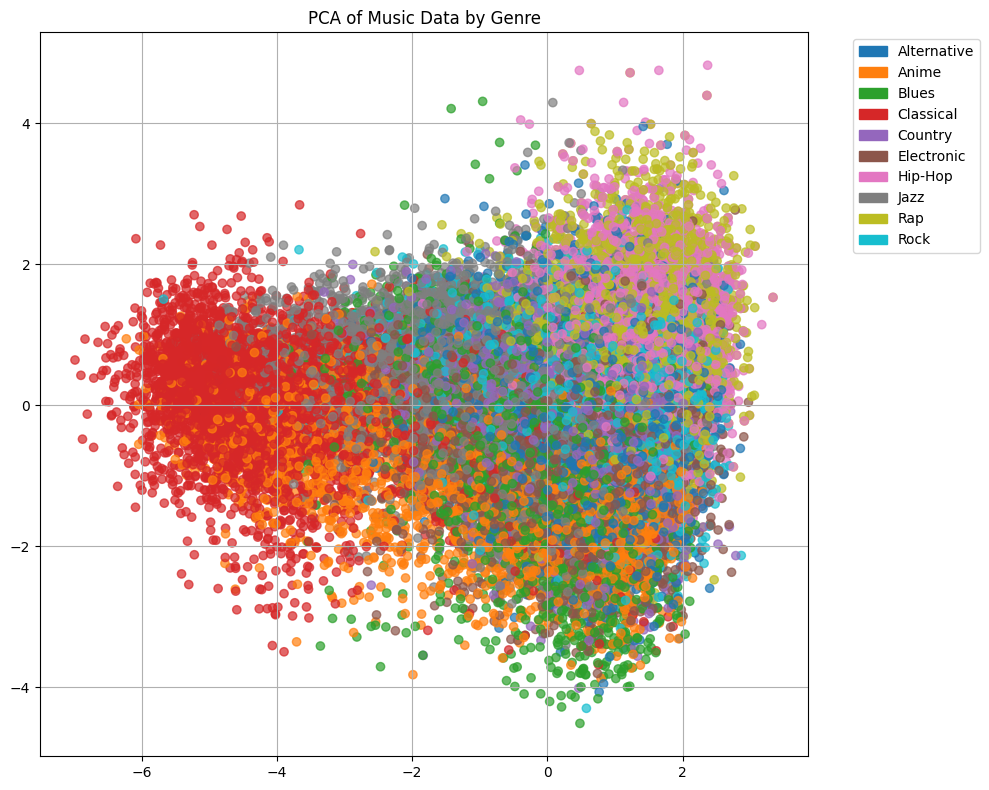

In [23]:
# Pca
X_pca = PCA(n_components=2, random_state=13133910).fit_transform(X_train)

# Encode the genre labels
colors = plt.cm.tab10.colors  # 10 colors
labels = label_encoder.classes_  # 10 labels

# legend patch for each label
patches = [mpatches.Patch(color=colors[i % 10], label=label) for i, label in enumerate(labels)]

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.title("PCA of Music Data by Genre")
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left') # Save labels outside the plot
plt.tight_layout()
plt.grid(True)
plt.show()


**PCA Analysis**  
In the PCA projection space, certain genres such as *Classical* and *Hip-Hop* form relatively distinguishable clusters, indicating that these genres have more unique audio characteristics in the selected features.  
However, other genres such as *Rock*, *Jazz*, and *Electronic* are highly overlapped, suggesting potential difficulty for classification models to separate them clearly using only the raw feature space.  
PCA preserves global structure, and the results show that while some genre separations exist, the overall distribution appears continuous rather than well-partitioned.


### tSNE
**Goal**: Visualize high-dimensional data by preserving local similarity in a low-dimensional space.  
**Parameters Used**:
- `n_components = 2`
- `perplexity = 30`: Number of effective nearest neighbors (common range: 5–50)
- `random_state = 13133910`: Ensures reproducibility

**Notes**:
- Preserves local structure
- Computationally expensive
- Not suitable for new data transformation
- Sensitive to parameter tuning

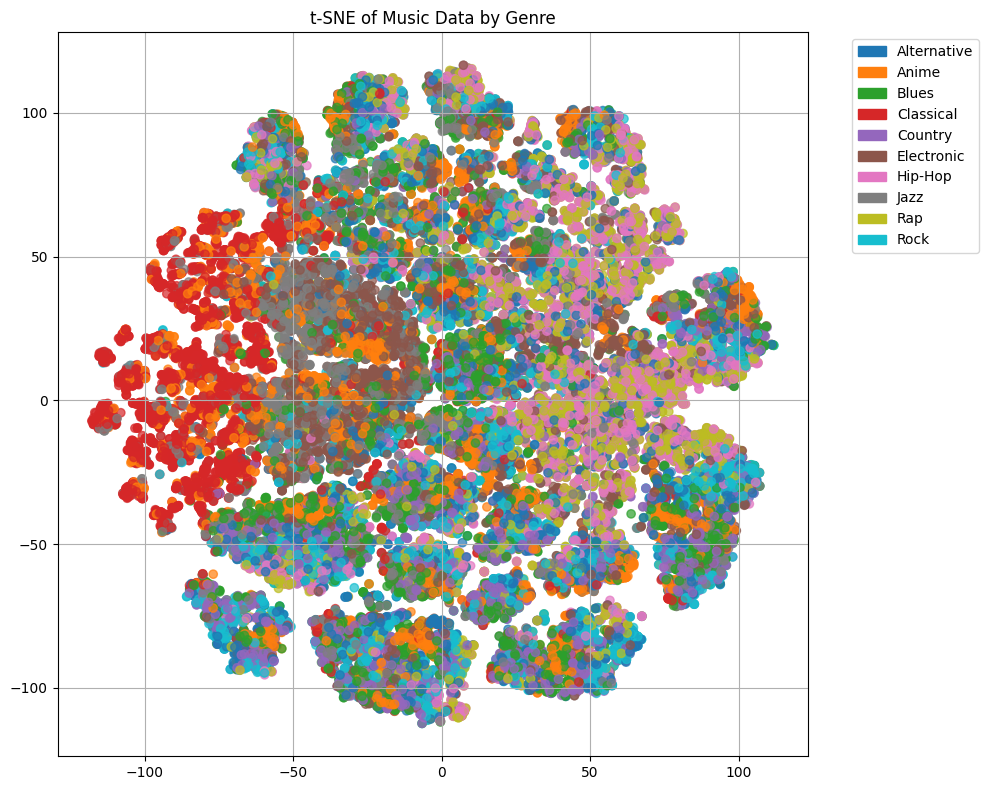

In [24]:
# 
tsne = TSNE(n_components=2, perplexity=20, random_state=13133910)
# X_tsne = tsne.fit_transform(features)
X_tsne = tsne.fit_transform(X_train)

#
colors = plt.cm.tab10.colors
labels = label_encoder.classes_
patches = [mpatches.Patch(color=colors[i % 10], label=label) for i, label in enumerate(labels)]

plt.figure(figsize=(10, 8))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=musicData['genre_encoded'], cmap='tab10', alpha=0.7)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.title("t-SNE of Music Data by Genre")
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Umap
**Goal**: Learn a lower-dimensional representation of data by preserving local neighborhood structure.  
**Parameters Used**:
- `n_components = 2`
- `random_state = 13133910`: For reproducibility
- (Default `n_neighbors = 15`, `min_dist = 0.1` unless specified)

**Notes**:
- Faster than t-SNE
- Preserves both local and some global structure
- Can project new data
- More stable across runs

f:\Data_Science\envs\FML\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Data_Science\envs\FML\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


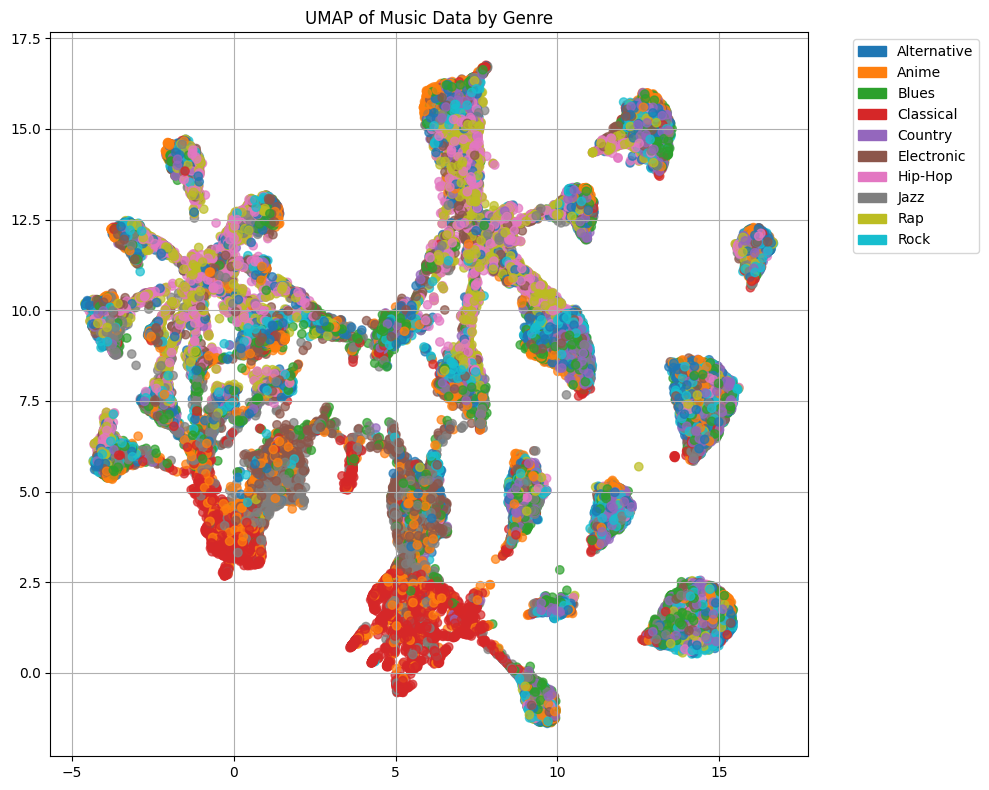

In [25]:

umap_model = umap.UMAP(n_components=2, metric='euclidean', random_state=13133910)
# X_umap = umap_model.fit_transform(features)
X_umap = umap_model.fit_transform(X_train)

colors = plt.cm.tab10.colors
labels = label_encoder.classes_
patches = [mpatches.Patch(color=colors[i % 10], label=label) for i, label in enumerate(labels)]

plt.figure(figsize=(10, 8))
# plt.scatter(X_umap[:, 0], X_umap[:, 1], c=musicData['genre_encoded'], cmap='tab10', alpha=0.7)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.title("UMAP of Music Data by Genre")
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**UMAP Analysis**  
UMAP projection reveals clearer local clustering compared to PCA, especially for genres like *Classical* and *Hip-Hop*, which form compact and separable regions.  
UMAP better preserves non-linear relationships and neighborhood continuity.  
Genres like *Rock* and *Electronic* are more widely dispersed, indicating internal diversity or overlapping characteristics with other genres.  
This suggests potential challenges for accurate genre classification using standard features.


### LDA

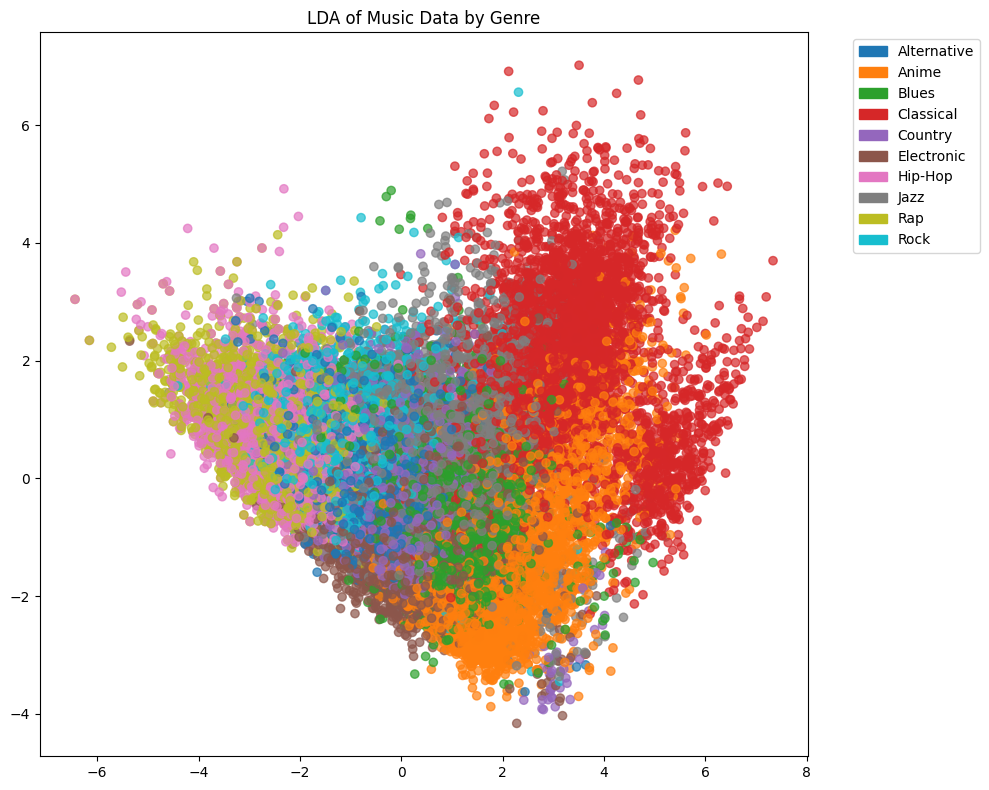

In [26]:
# Initialize and fit LDA (max 9 components for 10 classes)
lda = LinearDiscriminantAnalysis(n_components=2)
# X_lda = lda.fit_transform(features, musicData['genre_encoded'])
X_lda = lda.fit_transform(X_train, y_train)


# Prepare color legend
colors = plt.cm.tab10.colors
labels = label_encoder.classes_
patches = [mpatches.Patch(color=colors[i % 10], label=label) for i, label in enumerate(labels)]

# Plot the 2D projection
plt.figure(figsize=(10, 8))
# plt.scatter(X_lda[:, 0], X_lda[:, 1], c=musicData['genre_encoded'], cmap='tab10', alpha=0.7)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.title("LDA of Music Data by Genre")
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**LDA Analysis**  
LDA leverages the known genre labels to find directions that maximize class separation.  
Its two discriminant components produce the clearest visual grouping: *Classical* and *Anime* occupy distinct zones, *Hip‑Hop* and *Rap* cluster together, and the remaining genres fan out in a continuum.  
LDA’s supervised projection confirms that while genres overlap in raw feature space, there do exist linear combinations of features that improve separability.  

# Unsupervised Clustering

### kMeans with PCA

In [27]:
pca_10d = PCA(n_components=10, random_state=13133910)
# X_pca_10d = pca_10d.fit_transform(features)
X_pca_10d = pca_10d.fit_transform(X_train)

100%|██████████| 13/13 [03:27<00:00, 15.96s/it]


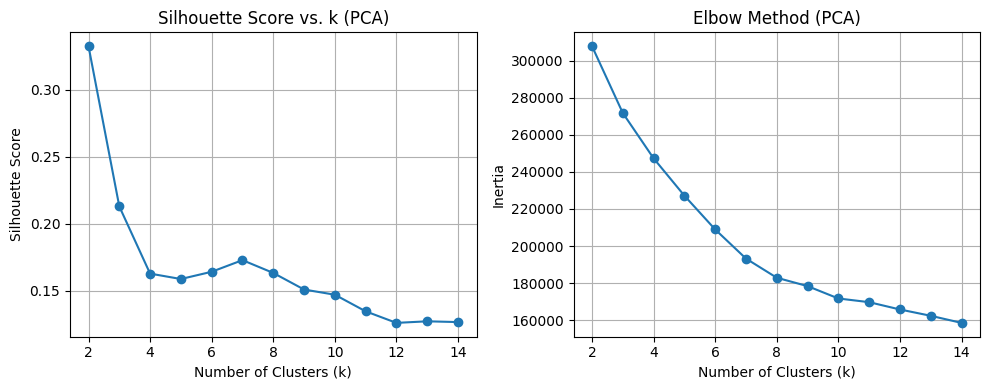

In [29]:
# Step 2: Find the best k with silhouette score
k_range = range(2, 15) 
silhouette_scores_pca = []
inertias_pca = []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=13133910)
    cluster_labels = kmeans.fit_predict(X_pca_10d)
    score = silhouette_score(X_pca_10d, cluster_labels)
    silhouette_scores_pca.append(score)
    inertias_pca.append(kmeans.inertia_)


# Silhouette Score curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores_pca, marker='o')
plt.title('Silhouette Score vs. k (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Elbow Method curve
plt.subplot(1, 2, 2)
plt.plot(k_range, inertias_pca, marker='o')
plt.title('Elbow Method (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()



In [30]:
# Step 4: find the best k
best_k = k_range[np.argmax(silhouette_scores_pca)]
print(f'✅ Best k found by Silhouette Score: {best_k}')
kmeans_final = KMeans(n_clusters=best_k, random_state=13133910)
final_labels = kmeans_final.fit_predict(X_pca_10d)

✅ Best k found by Silhouette Score: 2


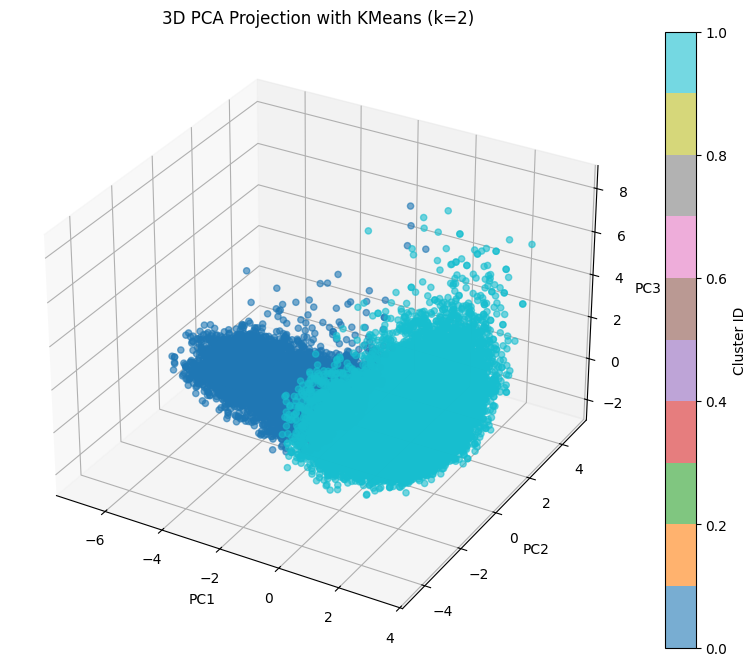

In [31]:

# pca_3d = PCA(n_components=3, random_state=13133910)
# X_pca_3d = pca_3d.fit_transform(features)
pc1 = X_pca_10d[:, 0]
pc2 = X_pca_10d[:, 1]
pc3 = X_pca_10d[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc1, pc2, pc3,
                     c=final_labels, cmap='tab10', alpha=0.6)
ax.set_title(f'3D PCA Projection with KMeans (k={best_k})')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(scatter, label='Cluster ID')
plt.show()

In [32]:
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")

0: Alternative
1: Anime
2: Blues
3: Classical
4: Country
5: Electronic
6: Hip-Hop
7: Jazz
8: Rap
9: Rock


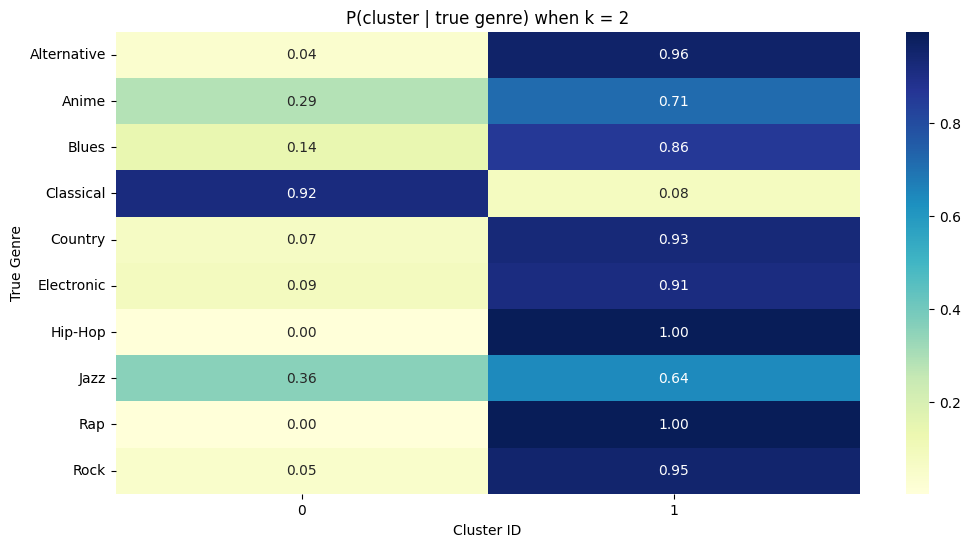

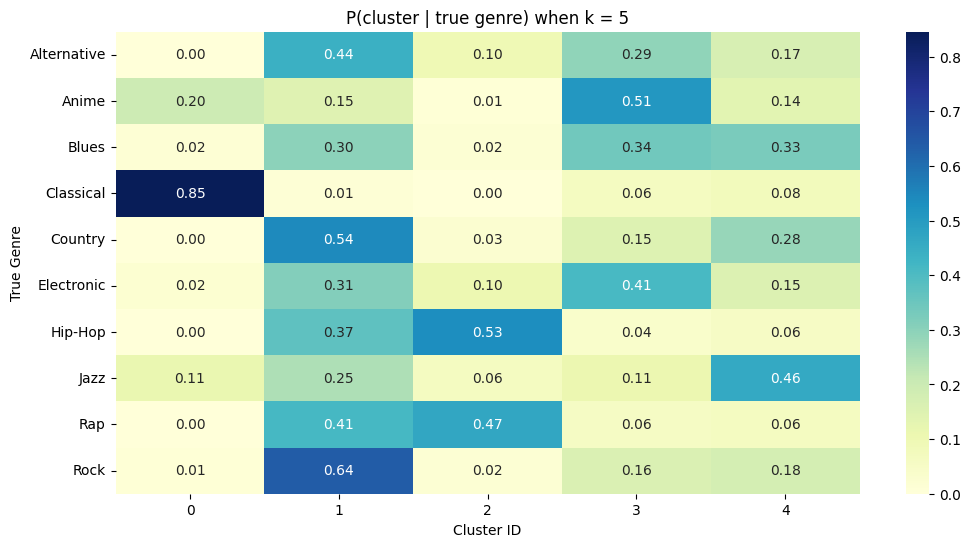

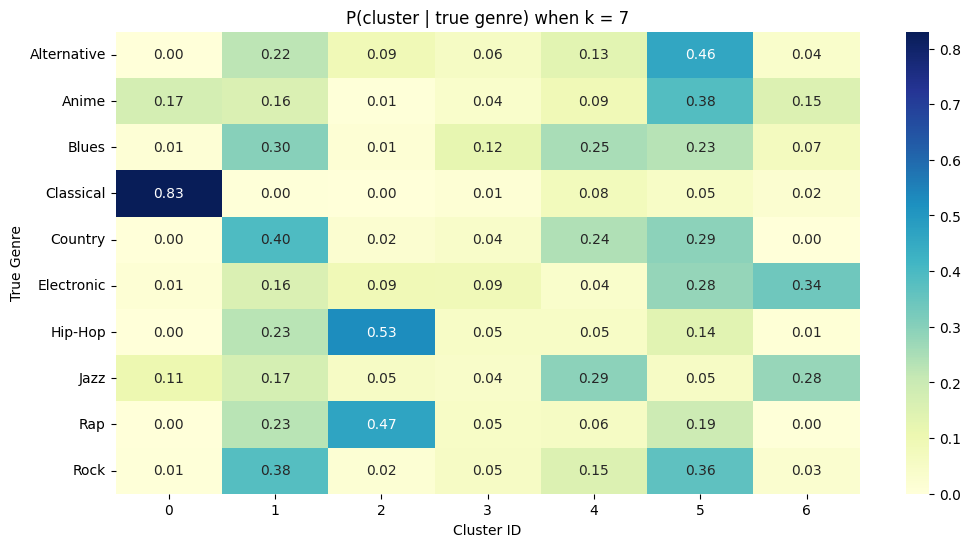

In [33]:
# genre_labels = musicData['music_genre']
genre_labels = y_train

def cluster_and_plot(k, features, true_labels, title_suffix=""):
    kmeans = KMeans(n_clusters=k, random_state=13133910)
    clusters = kmeans.fit_predict(features)

    df = pd.DataFrame({
        'genre': true_labels,
        'cluster': clusters
    })
    df['genre_name'] = df['genre'].map(
        {i:lab for i,lab in enumerate(label_encoder.classes_)}
    )

    crosstab = pd.crosstab(df['genre_name'], df['cluster'])

    # Normalize the crosstab by row
    crosstab_norm_row = crosstab.div(crosstab.sum(axis=1), axis=0)

    # Plotting
    plt.figure(figsize=(12,6))
    sns.heatmap(crosstab_norm_row, annot=True, fmt='.2f', cmap='YlGnBu')
    plt.title(f'P(cluster | true genre) when k = {k}')
    plt.xlabel('Cluster ID')
    plt.ylabel('True Genre')
    plt.show()

# Use the PCA
cluster_and_plot(2, X_pca_10d, genre_labels, title_suffix="")

cluster_and_plot(5, X_pca_10d, genre_labels, title_suffix="")

cluster_and_plot(7, X_pca_10d, genre_labels, title_suffix="")

To further explore the genre structure in the dataset, I experimented with multiple cluster counts in KMeans (k=2, 3, and 5). The heatmaps revealed that while k=2 cleanly separated Classical from all other genres, it collapsed the rest into a single undifferentiated cluster, limiting interpretability.  
At k=3, some separation emerged between Hip-Hop and genres like Jazz or Anime, but overlap remained substantial. k=5 showed the most promising structure, with genres like Classical, Hip-Hop, and Rap beginning to form more distinct groupings. For example, a specific cluster became heavily dominated by Hip-Hop (e.g., >90% Hip-Hop songs), while another became predominantly Classical.  
These results suggest that while genre boundaries are inherently fuzzy in feature space, unsupervised clustering at k=5 starts to align with real-world genre distinctions. However, some genres (e.g., Rock, Electronic) remained challenging to isolate, confirming the necessity of supervised classification techniques in downstream modeling.  


### kMeans with UMAP

In [34]:
umap_model_10d = umap.UMAP(n_components=10, metric='euclidean', random_state=13133910)
# X_umap = umap_model.fit_transform(features)
X_umap_10d = umap_model_10d.fit_transform(X_train)

f:\Data_Science\envs\FML\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Data_Science\envs\FML\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


100%|██████████| 13/13 [04:46<00:00, 22.04s/it]


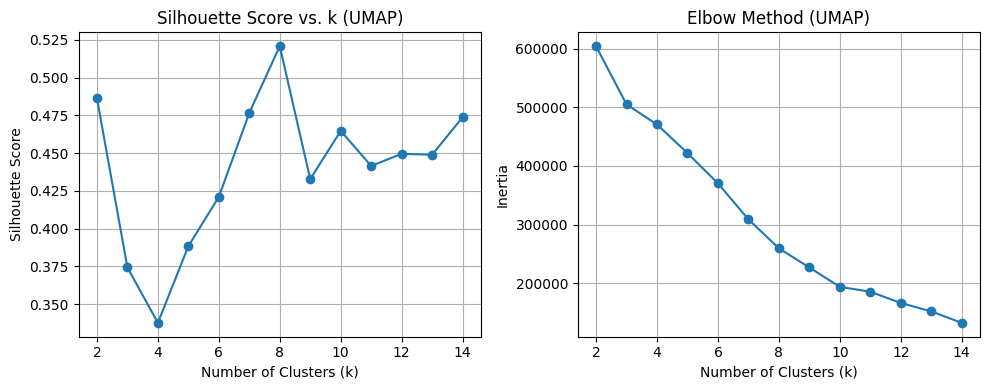

In [35]:
# 用于记录不同 k 下的得分
silhouette_scores_umap = []
inertias_umap = []

K = range(2, 15)

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k, random_state=13133910)
    labels = kmeans.fit_predict(X_umap_10d)
    score = silhouette_score(X_umap_10d, labels)
    
    silhouette_scores_umap.append(score)
    inertias_umap.append(kmeans.inertia_)

# Silhouette Score 曲线图
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, silhouette_scores_umap, marker='o')
plt.title('Silhouette Score vs. k (UMAP)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Elbow Method 曲线图
plt.subplot(1, 2, 2)
plt.plot(K, inertias_umap, marker='o')
plt.title('Elbow Method (UMAP)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()

In [36]:
best_k_umap = k_range[np.argmax(silhouette_scores_umap)]
# best_k = 2
print(f'✅ Best k found by Silhouette Score: {best_k_umap}')

kmeans_final_umap = KMeans(n_clusters=best_k_umap, random_state=13133910)
final_labels_umap = kmeans_final_umap.fit_predict(X_umap_10d)

✅ Best k found by Silhouette Score: 8


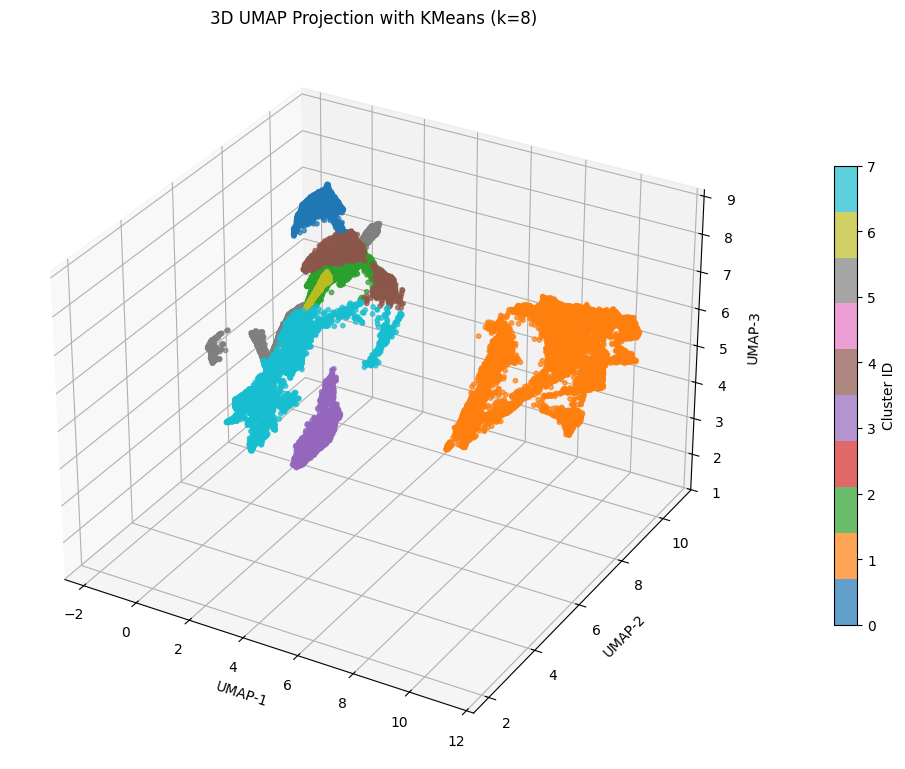

In [37]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    X_umap_10d[:, 0], 
    X_umap_10d[:, 1], 
    X_umap_10d[:, 2],
    c=final_labels_umap,
    cmap='tab10',
    s=10,
    alpha=0.7
)

ax.set_title(f'3D UMAP Projection with KMeans (k={best_k_umap})')
ax.set_xlabel('UMAP‑1')
ax.set_ylabel('UMAP‑2')
ax.set_zlabel('UMAP‑3')

cbar = fig.colorbar(sc, pad=0.1, shrink=0.6)
cbar.set_label('Cluster ID')

plt.tight_layout()
plt.show()

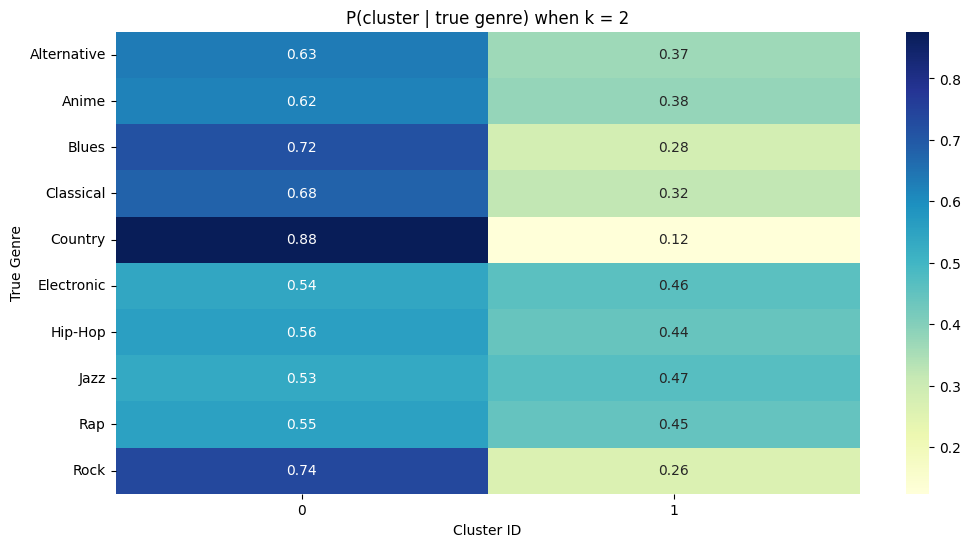

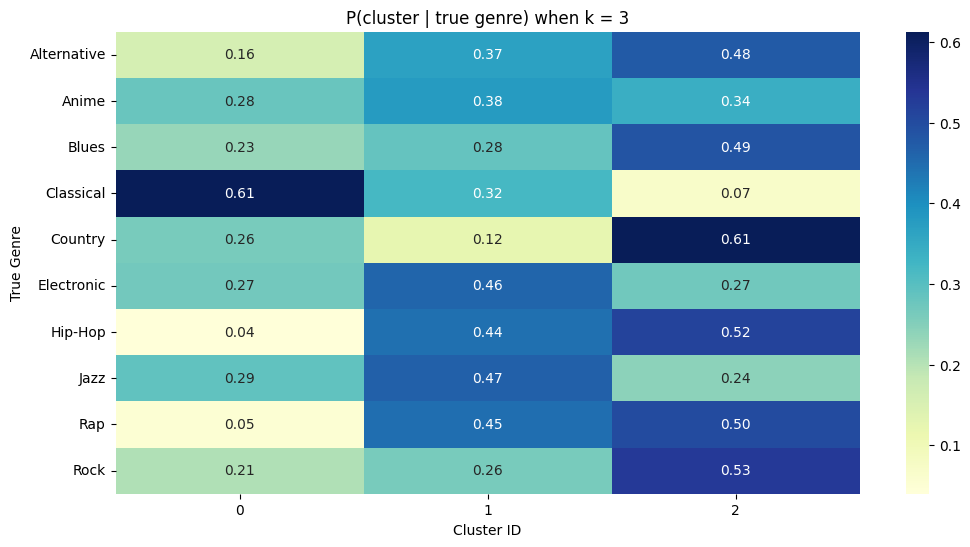

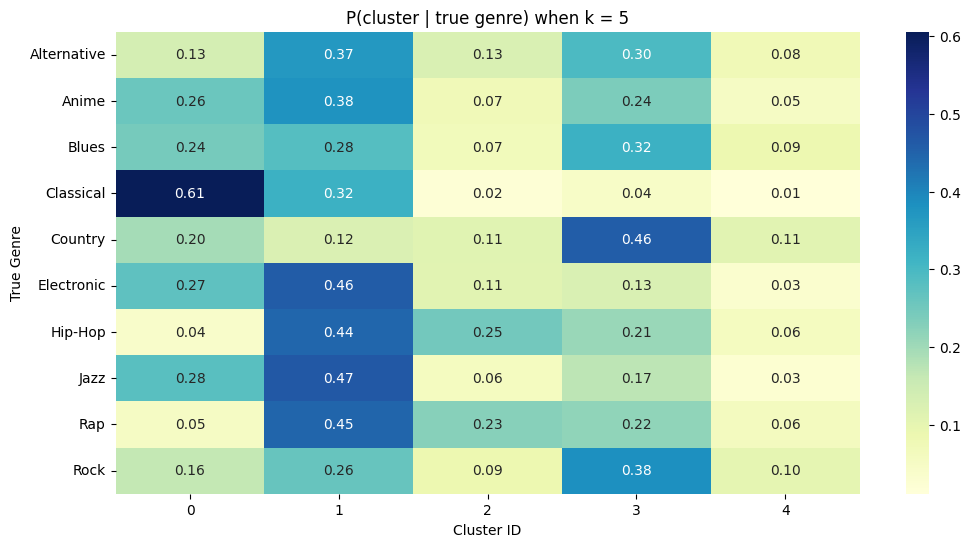

In [38]:
cluster_and_plot(2, X_umap_10d , genre_labels, title_suffix="")

cluster_and_plot(3, X_umap_10d , genre_labels, title_suffix="")

cluster_and_plot(5, X_umap_10d , genre_labels, title_suffix="")

# Modeling
- `SVM`
- `Logistic Regression`
- `XGBoost`
- `Decision Tree`
- `Random Forest`
- `Neural Network`

**Why Dimension Reduction Before Classification?**

Dimensionality reduction techniques such as PCA, t-SNE, and UMAP are not strictly required for classification, but they offer several advantages:

1. **Exploratory Visualization**: PCA/t-SNE/UMAP can project high-dimensional data into 2D to reveal natural clusters and overlapping regions, providing valuable insight before model training.
2. **Noise Reduction & Efficiency**: PCA reduces collinearity and dimensionality, which helps prevent overfitting and speeds up training.
3. **Improved Interpretability**: Principal components can sometimes represent latent themes or axes of variation in the data.
4. **Pipeline Integration**: PCA can be embedded in modeling pipelines as a preprocessing step before classification.

Note: While PCA-transformed data can be fed into classifiers, t-SNE/UMAP are mainly for visualization and are not suitable for direct input to supervised models.


**Make sure to do the following train/test split:**  
- For *each* genre, use 500 randomly picked songs for the test set and the other 4500 songs from that genre for the training set.   
- So the complete test set will be 5000x1 randomly picked genres (one per song, 500 from each genre). Use all the other data in the training set and make sure there is no leakage.  

In [39]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Enable probability for AUC
    'Neural Network': MLPClassifier(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [40]:
metrics_result = {
    'Model': [],
    'Accuracy': [],
    'Precision (macro)': [],
    'Recall (macro)': [],
    'F1-score (macro)': [],
    'ROC AUC (macro)': []
}
for name, model in models.items():
    # 1️⃣ 训练
    model.fit(X_train, y_train)
    
    # 2️⃣ 预测
    y_pred = model.predict(X_test)
    
    # 3️⃣ 计算各项指标
    acc   = accuracy_score(y_test, y_pred)
    prec  = precision_score(y_test, y_pred, average='macro')
    rec   = recall_score(y_test, y_pred, average='macro')
    f1    = f1_score(y_test, y_pred, average='macro')
    
    # 对于 AUC，需要先拿到 predict_proba（部分模型可能不支持）
    try:
        y_proba = model.predict_proba(X_test)
        auc    = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except Exception:
        auc = float('nan')
    
    # 4️⃣ 存结果
    metrics_result['Model'].append(name)
    metrics_result['Accuracy'].append(acc)
    metrics_result['Precision (macro)'].append(prec)
    metrics_result['Recall (macro)'].append(rec)
    metrics_result['F1-score (macro)'].append(f1)
    metrics_result['ROC AUC (macro)'].append(auc)



f:\Data_Science\envs\FML\lib\site-packages\xgboost\training.py:183: UserWarning: [10:09:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [41]:
from IPython.display import display

results_df = pd.DataFrame(metrics_result).set_index('Model')
metrics_df = results_df.sort_values(by='ROC AUC (macro)', ascending=False)
display(metrics_df)

Accuracy  Precision (macro)  Recall (macro)  \
Model                                                              
Neural Network         0.5660           0.569021          0.5660   
XGBoost                0.5624           0.568029          0.5624   
SVM                    0.5696           0.572717          0.5696   
Random Forest          0.5324           0.535765          0.5324   
Logistic Regression    0.5240           0.522400          0.5240   
K-Nearest Neighbors    0.4564           0.466019          0.4564   
Decision Tree          0.4256           0.425274          0.4256   

                     F1-score (macro)  ROC AUC (macro)  
Model                                                   
Neural Network               0.554895         0.928176  
XGBoost                      0.562212         0.926724  
SVM                          0.566184         0.922889  
Random Forest                0.532688         0.909755  
Logistic Regression          0.519944         0.903639  
K-Nearest Neighbors          0.458368         0.830901  
Decision Tree                0.424784         0.686267

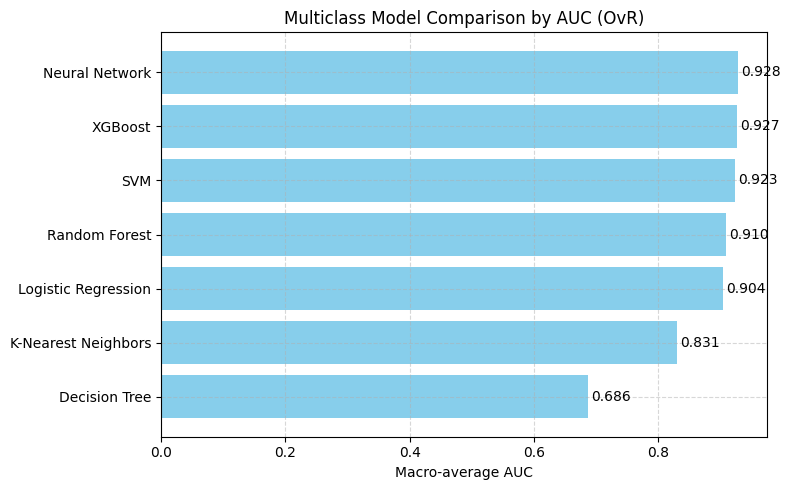

In [42]:
auc_series = results_df['ROC AUC (macro)']

# 2) Sort by AUC
auc_series = auc_series.sort_values(ascending=True) # ascending=False for descending order

# bar plot
plt.figure(figsize=(8, 5))
plt.barh(auc_series.index, auc_series.values, color='skyblue')
plt.xlabel('Macro‑average AUC')
plt.title('Multiclass Model Comparison by AUC (OvR)')
# add auc values to the end of each bar
for i, (model, auc) in enumerate(auc_series.items()):
    plt.text(auc + 0.005, i, f'{auc:.3f}', va='center')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Neural Network with PCA

In [43]:
all_feature_columns

['popularity',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'key_A',
 'key_A#',
 'key_B',
 'key_C',
 'key_C#',
 'key_D',
 'key_D#',
 'key_E',
 'key_F',
 'key_F#',
 'key_G',
 'key_G#',
 'mode_Major',
 'mode_Minor']

In [44]:
pca = PCA(n_components=0.95, random_state=13133910)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

In [45]:
# 1. Turn PCA componenets into dataframe
loadings = pd.DataFrame(
    pca.components_.T,        # 转置后，每行对应一个原始特征、每列对应一个主成分
    index=all_feature_columns,      # 行索引：原始特征名
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# 2. Print the first few rows of the loadings DataFrame
print(loadings.head())

# 3. Find the top contributors to each PC
for pc in ["PC1","PC2"]:
    sorted_load = loadings[pc].abs().sort_values(ascending=False)
    print(f"\nTop contributors to {pc}:")
    print(sorted_load.head(10))

                   PC1       PC2       PC3       PC4       PC5       PC6  \
popularity    0.259032  0.468449  0.125159 -0.366005 -0.392192  0.512973   
danceability  0.312189  0.457240 -0.121816  0.353743  0.094584  0.253434   
energy        0.444534 -0.349864 -0.074265 -0.085075  0.213816  0.030370   
loudness      0.464542 -0.199431 -0.073438 -0.166000  0.070578 -0.046052   
speechiness   0.176145  0.372866  0.637800  0.110851  0.500217 -0.303679   

                   PC7       PC8       PC9      PC10      PC11      PC12  \
popularity   -0.376318 -0.059189  0.034879  0.008669  0.015226  0.013424   
danceability  0.623901  0.240543  0.057363  0.048683  0.139841  0.085837   
energy       -0.188286 -0.021602  0.204352  0.177691  0.614201  0.360591   
loudness      0.094894  0.011064  0.612563 -0.127170 -0.472569 -0.278935   
speechiness  -0.251528  0.027424  0.006286 -0.010038 -0.051982 -0.005475   

                  PC13      PC14  
popularity   -0.001545  0.001935  
danceability -0.

In [46]:

param_grid = {
    'hidden_layer_sizes': [(100,), (100,50), (200,100,50)],
    'alpha': [1e-4, 1e-3, 1e-2],
    'activation': ['relu', 'tanh', 'logistic','identity'],
    'learning_rate_init': [1e-3, 1e-4],
}
gs = GridSearchCV(
    MLPClassifier(early_stopping=True,
                  validation_fraction=0.1,
                  n_iter_no_change=5,
                  random_state=13133910,
                  verbose=False),
    param_grid,
    scoring='roc_auc_ovr',
    cv=5,
    n_jobs=-1,
    verbose=2
)
gs.fit(X_train_pca, y_train)
print("Best NN params:", gs.best_params_)
print("CV macro‑AUC:", gs.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best NN params: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.001}
CV macro‑AUC: 0.9260476213991768


In [47]:
# Average AUC 
probs = gs.best_estimator_.predict_proba(X_test_pca)
auc_macro = roc_auc_score(y_test, probs, multi_class='ovr', average='macro')
print("Test macro‑AUC:", auc_macro)

Test macro‑AUC: 0.9291561333333334


Iteration 1, loss = 1.35986068
Validation score: 0.550000
Iteration 2, loss = 1.18603294
Validation score: 0.557333
Iteration 3, loss = 1.15777379
Validation score: 0.564222
Iteration 4, loss = 1.13752874
Validation score: 0.556444
Iteration 5, loss = 1.12523540
Validation score: 0.558444
Iteration 6, loss = 1.11307325
Validation score: 0.570667
Iteration 7, loss = 1.10383644
Validation score: 0.565556
Iteration 8, loss = 1.09475556
Validation score: 0.573556
Iteration 9, loss = 1.08476400
Validation score: 0.567111
Iteration 10, loss = 1.07876200
Validation score: 0.573556
Iteration 11, loss = 1.07301661
Validation score: 0.575556
Iteration 12, loss = 1.06794080
Validation score: 0.576667
Iteration 13, loss = 1.06254675
Validation score: 0.571556
Iteration 14, loss = 1.05987890
Validation score: 0.578889
Iteration 15, loss = 1.05661924
Validation score: 0.590889
Iteration 16, loss = 1.05344537
Validation score: 0.580000
Iteration 17, loss = 1.04979474
Validation score: 0.584444
Iterat

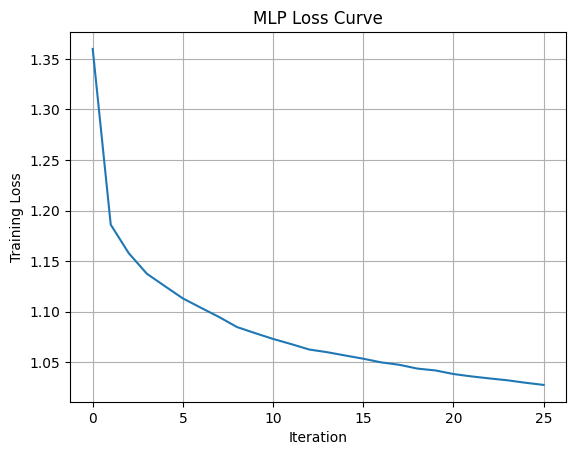

In [48]:
# Modeling with the best parameters
# mlp = MLPClassifier(
#     hidden_layer_sizes=(200, 100, 50),
#     activation='relu',
#     solver='adam',
#     alpha=0.01,
#     max_iter=500,
#     learning_rate_init=0.001,
#     early_stopping=True,
#     random_state=13133910,
#     warm_start=True,
#     verbose=True
# )
best_params = gs.best_params_
mlp = MLPClassifier(
    **best_params,
    max_iter=500,
    early_stopping=True,
    random_state=13133910,
    warm_start=True,
    verbose=True
)
mlp.fit(X_train_pca, y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("MLP Loss Curve")
plt.grid()
plt.show()


In [49]:
y_pred = mlp.predict(X_test_pca)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.4431    0.4280    0.4354       500
           1     0.7825    0.6980    0.7378       500
           2     0.6070    0.4540    0.5195       500
           3     0.8158    0.8240    0.8199       500
           4     0.5166    0.5280    0.5223       500
           5     0.6619    0.5520    0.6020       500
           6     0.4588    0.6340    0.5323       500
           7     0.5239    0.5700    0.5460       500
           8     0.4681    0.3080    0.3715       500
           9     0.5157    0.7220    0.6017       500

    accuracy                         0.5718      5000
   macro avg     0.5793    0.5718    0.5688      5000
weighted avg     0.5793    0.5718    0.5688      5000



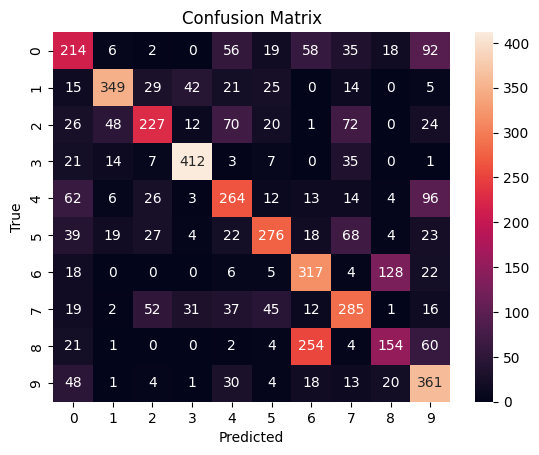

In [50]:
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=mlp.classes_,
            yticklabels=mlp.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


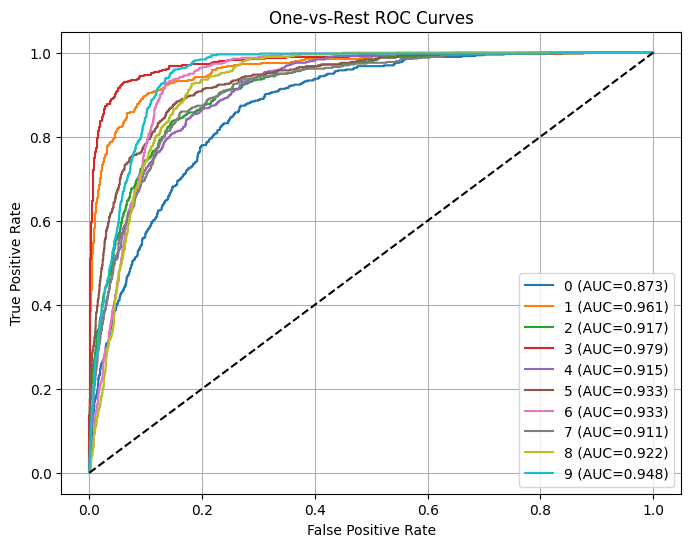

In [51]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_bin = label_binarize(y_test, classes=mlp.classes_)
probs = mlp.predict_proba(X_test_pca)

plt.figure(figsize=(8,6))
for i, c in enumerate(mlp.classes_):
    fpr, tpr, _ = roc_curve(y_bin[:, i], probs[:, i])
    plt.plot(fpr, tpr, label=f"{c} (AUC={auc(fpr,tpr):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One‑vs‑Rest ROC Curves")
plt.legend()
plt.grid()
plt.show()

In [52]:
y_train_pred = mlp.predict(X_train_pca)
y_test_pred = mlp.predict(X_test_pca)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1  = f1_score(y_test, y_test_pred, average='macro')
print(f"Train F1‑macro: {train_f1:.3f}")
print(f"Test  F1‑macro: {test_f1:.3f}")

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred) 
print(f"Train Acc = {train_acc:.3f}")
print(f"Test Acc = {test_acc:.3f}")

Train F1‑macro: 0.594
Test  F1‑macro: 0.569
Train Acc = 0.594
Test Acc = 0.572


## Overfitting check

[learning_curve] Training set sizes: [ 3600  7200 10800 14400 18000 21600 25200 28800 32400 36000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.5s finished


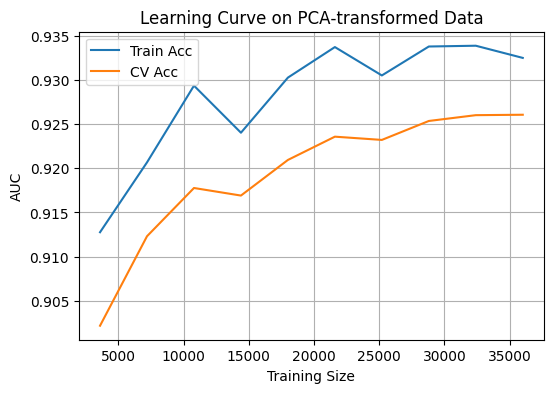

In [53]:
train_sizes, train_scores_auc, val_scores_auc = learning_curve(
    gs.best_estimator_, X_train_pca, y_train,
    cv=5,
    train_sizes=np.linspace(0.1,1.0,10),
    scoring='roc_auc_ovr',
    n_jobs=-1,
    verbose=1
)

train_mean = train_scores_auc.mean(axis=1)
val_mean   = val_scores_auc.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, label="Train Acc")
plt.plot(train_sizes, val_mean,   label="CV Acc")
plt.xlabel("Training Size"); plt.ylabel("AUC")
plt.title("Learning Curve on PCA‐transformed Data")
plt.legend(); plt.grid(True); plt.show()

## Modelling with kMeans (k = 7)
- testing to see how adding kMeans affects the performance of the model in general

In [54]:
from sklearn.preprocessing import OneHotEncoder
# 1) PCA to 10D for clustering
pca_10d = PCA(n_components=10, random_state=13133910).fit(X_train)
X_train_pca10 = pca_10d.transform(X_train)
X_test_pca10  = pca_10d.transform(X_test)

# 2) KMeans (k=7) on train PCA space
kmeans = KMeans(n_clusters=7, random_state=13133910).fit(X_train_pca10)

train_labels = kmeans.labels_                     # (n_train,)
test_labels  = kmeans.predict(X_test_pca10)       # (n_test,)

train_dists = kmeans.transform(X_train_pca10)     # (n_train,7)
test_dists  = kmeans.transform(X_test_pca10)      # (n_test,7)

# 3) One-hot encode cluster labels
ohe = OneHotEncoder(sparse_output=False).fit(train_labels.reshape(-1,1))
train_ohe = ohe.transform(train_labels.reshape(-1,1))  # (n_train,7)
test_ohe  = ohe.transform(test_labels.reshape(-1,1))   # (n_test,7)

In [55]:
# 4) Combine original features + cluster ohe + cluster distances
col_ohe  = [f"cluster_{i}"      for i in range(7)]
col_dist = [f"dist_cluster_{i}" for i in range(7)]

df_train = pd.DataFrame(X_train).reset_index(drop=True)
df_test  = pd.DataFrame(X_test).reset_index(drop=True)

df_train_feats = pd.concat([
    df_train,
    pd.DataFrame(train_ohe,   columns=col_ohe),
    pd.DataFrame(train_dists, columns=col_dist)
], axis=1)

df_test_feats = pd.concat([
    df_test,
    pd.DataFrame(test_ohe,   columns=col_ohe),
    pd.DataFrame(test_dists, columns=col_dist)
], axis=1)


In [56]:

# 5) Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 6) Train each once on enhanced features and evaluate
metrics_result = {
    'Model': [], 'Accuracy': [], 
    'Precision (macro)': [], 'Recall (macro)': [], 
    'F1-score (macro)': [], 'ROC AUC (macro)': []
}

for name, model in models.items():
    model.fit(df_train_feats, y_train)
    y_pred = model.predict(df_test_feats)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec  = recall_score(y_test, y_pred, average='macro')
    f1   = f1_score(y_test, y_pred, average='macro')
    try:
        y_proba = model.predict_proba(df_test_feats)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        auc = np.nan

    metrics_result['Model'].append(name)
    metrics_result['Accuracy'].append(acc)
    metrics_result['Precision (macro)'].append(prec)
    metrics_result['Recall (macro)'].append(rec)
    metrics_result['F1-score (macro)'].append(f1)
    metrics_result['ROC AUC (macro)'].append(auc)


f:\Data_Science\envs\FML\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\Data_Science\envs\FML\lib\site-packages\xgboost\training.py:183: UserWarning: [10:24:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [57]:
results_df = pd.DataFrame(metrics_result).set_index('Model')
display(results_df.sort_values('ROC AUC (macro)', ascending=False))

Accuracy  Precision (macro)  Recall (macro)  \
Model                                                              
Neural Network         0.5714           0.576420          0.5714   
XGBoost                0.5566           0.562471          0.5566   
SVM                    0.5566           0.558965          0.5566   
Random Forest          0.5308           0.534273          0.5308   
Logistic Regression    0.5404           0.538662          0.5404   
K-Nearest Neighbors    0.4586           0.465124          0.4586   
Decision Tree          0.4326           0.434285          0.4326   

                     F1-score (macro)  ROC AUC (macro)  
Model                                                   
Neural Network               0.567730         0.927305  
XGBoost                      0.557007         0.926609  
SVM                          0.551693         0.916647  
Random Forest                0.531087         0.909810  
Logistic Regression          0.536494         0.909346  
K-Nearest Neighbors          0.459308         0.827956  
Decision Tree                0.432792         0.691383

In [58]:
display(metrics_df)

Accuracy  Precision (macro)  Recall (macro)  \
Model                                                              
Neural Network         0.5660           0.569021          0.5660   
XGBoost                0.5624           0.568029          0.5624   
SVM                    0.5696           0.572717          0.5696   
Random Forest          0.5324           0.535765          0.5324   
Logistic Regression    0.5240           0.522400          0.5240   
K-Nearest Neighbors    0.4564           0.466019          0.4564   
Decision Tree          0.4256           0.425274          0.4256   

                     F1-score (macro)  ROC AUC (macro)  
Model                                                   
Neural Network               0.554895         0.928176  
XGBoost                      0.562212         0.926724  
SVM                          0.566184         0.922889  
Random Forest                0.532688         0.909755  
Logistic Regression          0.519944         0.903639  
K-Nearest Neighbors          0.458368         0.830901  
Decision Tree                0.424784         0.686267